## Gaussian Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics.pairwise import rbf_kernel

In [2]:
# Config parameters

N = 10                     # number of training points
n = 50                     # number of test points

sn = 0.02                  # noise variance #0.00005

kernel_param = 0.1         # rbf kernel parameter
gamma= 0.5/kernel_param    # Overall rbf_kernel() gamma

##### Where gamma is from rbf_kernel():


In [3]:
# Definition of the unknown function (sine) we are trying to approximate

f = lambda x: np.sin(0.9*x).flatten()

In [4]:
# Images centering
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

In [5]:

def plot_f(x,y, title, symbol, color, size):
    plt.figure(1, figsize=size)
    plt.clf()
    plt.plot(x, y, symbol, color = color)
    plt.title(title)
    plt.axis([-5, 5, -4, 4])
    plt.grid()

#### Example

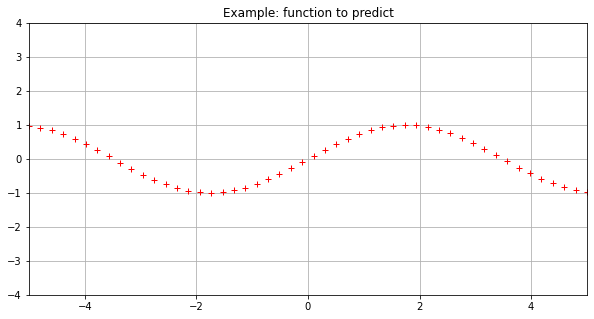

In [6]:
# Example 
Xe = np.linspace(-5,5, n)
Ye = f(Xe)

plot_f(Xe, Ye, 'Example: function to predict', symbol='+', color='r', size=(10, 5))

#### Test points

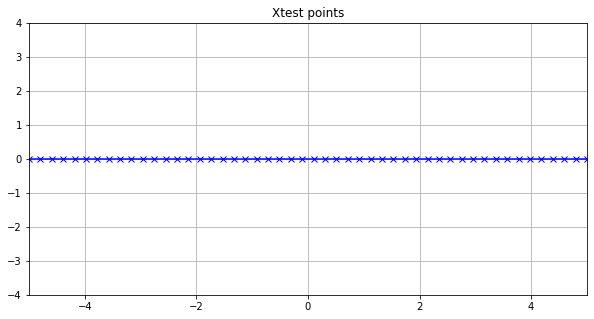

In [7]:
# We pick up n points equally spaced on x-axis in the range (-5, 5)
Xtest = np.linspace(-5,5, n).reshape(-1,1)

y = np.zeros(n)

plt.figure(1, figsize=(10, 5))
plt.clf()
plt.plot(Xtest, y, marker='x', color = 'b')
plt.title('Xtest points')
plt.axis([-5, 5, -4, 4])
plt.grid()

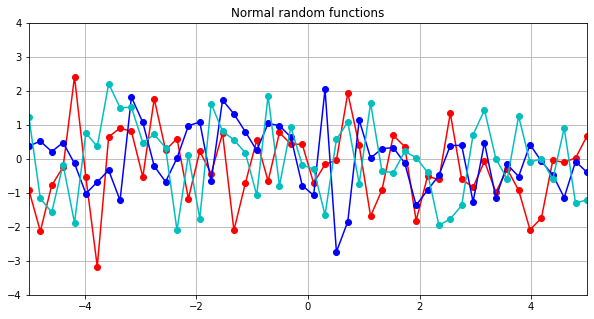

In [8]:
# We sample 3 times n random points from a standard normal 
sample_f = np.random.normal(size=(n,3))

plt.figure(1, figsize=(10, 5))

plt.clf()
plt.plot(Xtest, sample_f[:,0], marker='o', color = 'r')
plt.plot(Xtest, sample_f[:,1], marker='o', color = 'b')
plt.plot(Xtest, sample_f[:,2], marker='o', color = 'c')
plt.title('Normal random functions')

plt.axis([-5, 5, -4, 4])
plt.grid()

In [9]:
# We calculate the covariance matrix (kernel) on the 50 equally spaced Xtest points 
Kss = rbf_kernel(Xtest, Xtest, gamma)

# Cholesky matrix calculation
Lss = np.linalg.cholesky(Kss + sn*np.eye(n))

# Note that Cholesky matrix is used to create correlations among random variables. 
# Suppose that x1 and x2 are independent standard normal variables. 
# The matrix Ls can be used to create new variables z1 and z2 such that the covariance of z1 and z2 equals Σ
# In particular, if you generate p standard normal variates, the Cholesky transformation maps the variables into variables
# for the multivariate normal distribution with covariance matrix Σ and centered at the origin (denoted MVN(0, Σ)).

# See proof below

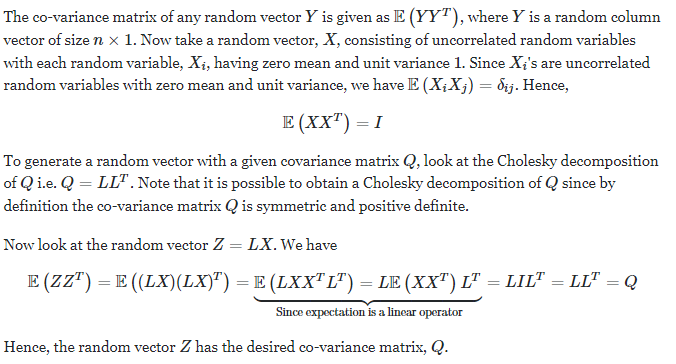

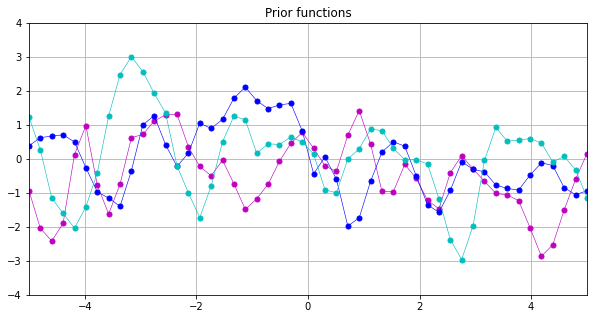

In [10]:
# By Cholesky trasformation we force the priors to have the same covariance matrix of the equally spaced Xtest points 

f_prior = np.dot(Lss, sample_f)

plt.figure(1, figsize=(10, 5))
plt.clf()
plt.plot(Xtest, f_prior[:,0], marker='o', color = 'm', linewidth=0.6, markersize=5)
plt.plot(Xtest, f_prior[:,1], marker='o', color = 'b', linewidth=0.6, markersize=5)
plt.plot(Xtest, f_prior[:,2], marker='o', color = 'c', linewidth=0.6, markersize=5)
plt.title('Prior functions')
plt.axis([-5, 5, -4, 4])
plt.grid()

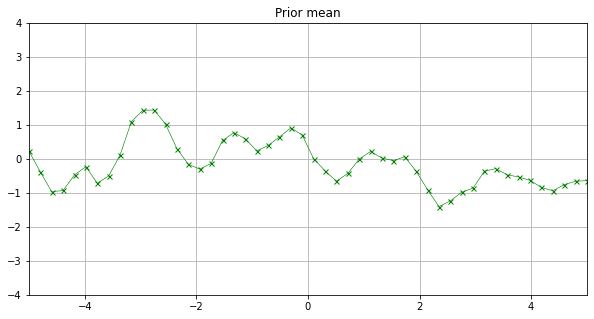

In [11]:
# The resulting priors have mean at each x that tends to zero wwith increasing n

prior_mean = f_prior.mean(axis=1)

plt.figure(1, figsize=(10, 5))
plt.clf()
plt.plot(Xtest, prior_mean, marker='x', color = 'g', linewidth=0.6, markersize=5)
plt.title('Prior mean')
plt.axis([-5, 5, -4, 4])
plt.grid()

#### Train points

Xtrain:
[[-2.14285714]
 [-1.32653061]
 [ 1.73469388]
 [-3.97959184]
 [ 1.53061224]
 [-3.7755102 ]
 [ 0.10204082]
 [-2.55102041]
 [ 2.75510204]
 [ 1.32653061]]
f(Xtrain):
[-0.93667828 -0.92980311  0.99995419  0.42597565  0.98138616  0.25356751
  0.0917077  -0.74841849  0.61469625  0.92980311]
y = f(X) + noise: 
[-0.9314329  -0.95833357  0.96387423  0.46456633  1.00120487  0.29140029
  0.11486425 -0.77223578  0.63533732  0.9263    ]


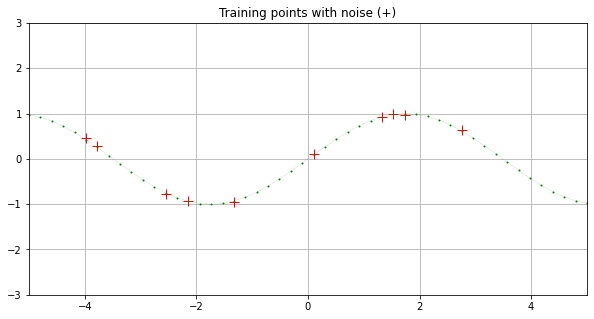

In [12]:
# The unknown underling function over the test points is
Yunknown = f(Xtest)

# We sample now some input points without noise from the initial unknown sine function and we use them as training points 
# to adjust our prior functions

Xtrain = np.random.choice(Xtest.ravel(), size=(N, 1), replace=False)
print('Xtrain:')
print(Xtrain)

fx = f(Xtrain)
print('f(Xtrain):')
print(fx)

# By adding the noise component the corresponding y=f(x) for the train points is

Ytrain = fx + sn*np.random.randn(N)

print('y = f(X) + noise: ')
print(Ytrain)

plt.figure(1, figsize=(10, 5))
plt.clf()
plt.plot(Xtrain, Ytrain, '+', color = 'r', ms=10)
plt.plot(Xtest, Yunknown, marker='o', color = 'g', linewidth=0.1, markersize=1)
plt.title('Training points with noise (+)')
plt.axis([-5, 5, -3, 3])
plt.grid()


### Theory overview

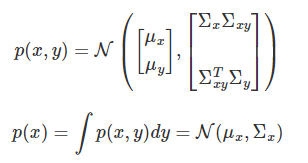

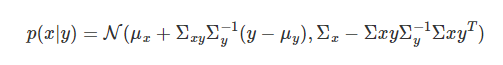

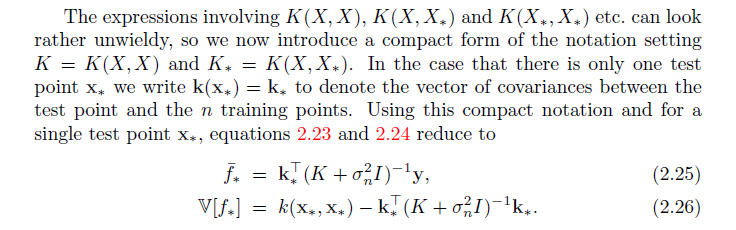

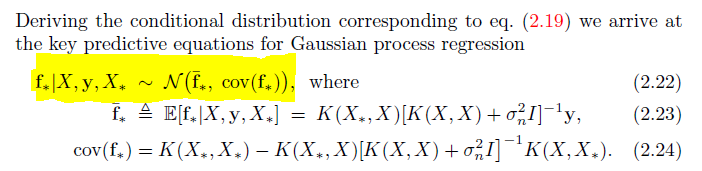

In [13]:
# By using the Cholesky decomposition we have:

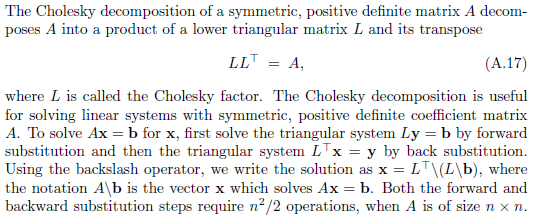

In [14]:
# The algorithm is:

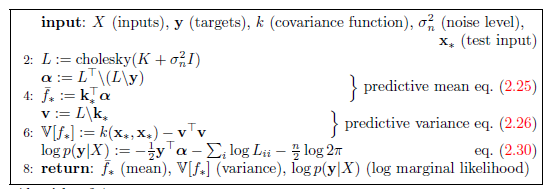

In [15]:
# Compute mean at our train points
K = rbf_kernel(Xtrain, Xtrain, gamma)
L = np.linalg.cholesky(K + sn*np.eye(len(Xtrain)))

Ly = np.linalg.solve(L, Ytrain)
alpha = np.linalg.solve(L.T, Ly)

Ks = rbf_kernel(Xtrain, Xtest, gamma)

meanFs = np.dot(Ks.T, alpha)

print('Predictive mean eq.2.25')
print(meanFs.shape)
print(meanFs)



# Compute the variance and standard deviation at our train points
v = np.linalg.solve(L, Ks)
covFs = Kss - np.dot(v.T, v)   # Covariance matrix
varFs = np.diag(covFs)         # np.diag gets the diagonal elements (variance) from argument matrix
stdFs = np.sqrt(varFs)
print('\nPredictive variance, diagonal of eq.2.26')
print(meanFs.shape)
print(varFs)

Predictive mean eq.2.25
(50,)
[ 3.29460835e-03  2.10758799e-02  8.79987810e-02  2.38332535e-01
  4.14151101e-01  4.52124459e-01  2.95586265e-01  9.79251659e-02
 -1.25256531e-02 -8.50879822e-02 -2.30842301e-01 -4.83621500e-01
 -7.62925289e-01 -9.37384954e-01 -9.17779074e-01 -7.66284774e-01
 -7.11391879e-01 -8.50625774e-01 -9.40025903e-01 -7.46995675e-01
 -3.97726635e-01 -1.36505977e-01 -1.54844307e-02  4.37544740e-02
  9.06179387e-02  1.12620573e-01  9.56753209e-02  7.80650279e-02
  1.40361214e-01  3.47645581e-01  6.55362037e-01  9.08777391e-01
  1.01041151e+00  9.45180484e-01  7.15387367e-01  4.61862441e-01
  4.00516974e-01  5.33233077e-01  6.22975839e-01  5.02383440e-01
  2.68741091e-01  9.48603025e-02  2.20798520e-02  3.38869438e-03
  3.42916702e-04  2.28804357e-05  1.00660547e-06  2.91993789e-08
  5.58479550e-10  7.04304186e-12]

Predictive variance, diagonal of eq.2.26
(50,)
[0.99993168 0.99733817 0.95689911 0.7153789  0.2336309  0.01892926
 0.01892926 0.23360341 0.71390717 0.92956

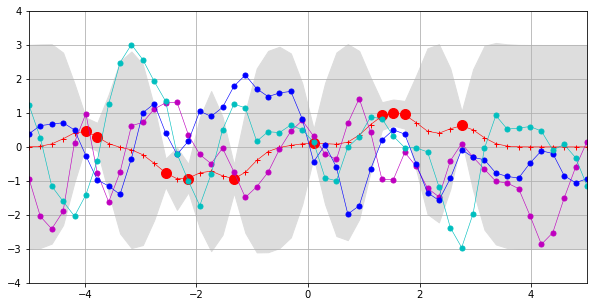

In [16]:
# Let's plot the mean and the standard deviation
plt.figure(1, figsize=(10, 5))
plt.clf()

# Plot train points
plt.plot(Xtrain, Ytrain, 'ro', ms=10)

# Plot posterior mean
plt.plot(Xtest, meanFs, 'r', marker='+', color = 'r', linewidth=0.6, markersize=5)

# Plot posterior confidence region
plt.gca().fill_between(Xtest.flat, meanFs-3*stdFs, meanFs+3*stdFs, color="#dddddd")

# Plot (unconstrained) priors
plt.plot(Xtest, f_prior[:,0], marker='o', color = 'm', linewidth=0.6, markersize=5)
plt.plot(Xtest, f_prior[:,1], marker='o', color = 'b', linewidth=0.6, markersize=5)
plt.plot(Xtest, f_prior[:,2], marker='o', color = 'c', linewidth=0.6, markersize=5)

plt.axis([-5, 5, -4, 4])
plt.grid()


# As we can see below the sampled priors are  not constrained to pass through the train points 

In [17]:
# We sample now 3 regression functions from the posterior distribution

f_post = np.random.multivariate_normal(meanFs, covFs, 3).T
f_post

array([[ 0.95885867, -1.35114015,  1.05605741],
       [ 0.48478826, -0.3178198 ,  1.20996942],
       [ 0.28378551,  0.61724613,  0.64075785],
       [ 0.31657591,  0.62856502,  0.15546086],
       [ 0.23357308,  0.1211232 ,  0.2344119 ],
       [ 0.25644862,  0.28749642,  0.37002134],
       [ 0.08250927,  0.4590788 ,  0.10532626],
       [-0.07767231,  0.07368484, -0.15327064],
       [ 0.61763062, -0.1614899 , -0.04373394],
       [ 1.50028991, -0.10383074,  0.2305809 ],
       [ 0.97084001, -0.34735736, -0.28726617],
       [-0.34698902, -0.9379685 , -1.01095715],
       [-0.82182517, -1.05054707, -0.74633185],
       [-0.92426329, -0.85936162, -0.45396749],
       [-1.21972637, -1.1114052 , -1.10634872],
       [-0.70488299, -1.03468395, -1.34562051],
       [-0.38409369, -0.44828285, -0.80820553],
       [-1.01855627, -0.39972362, -0.80243156],
       [-1.01210947, -1.1537646 , -0.95388037],
       [-0.66319205, -1.793619  , -0.33086512],
       [-0.96955198, -1.50049211,  0.417

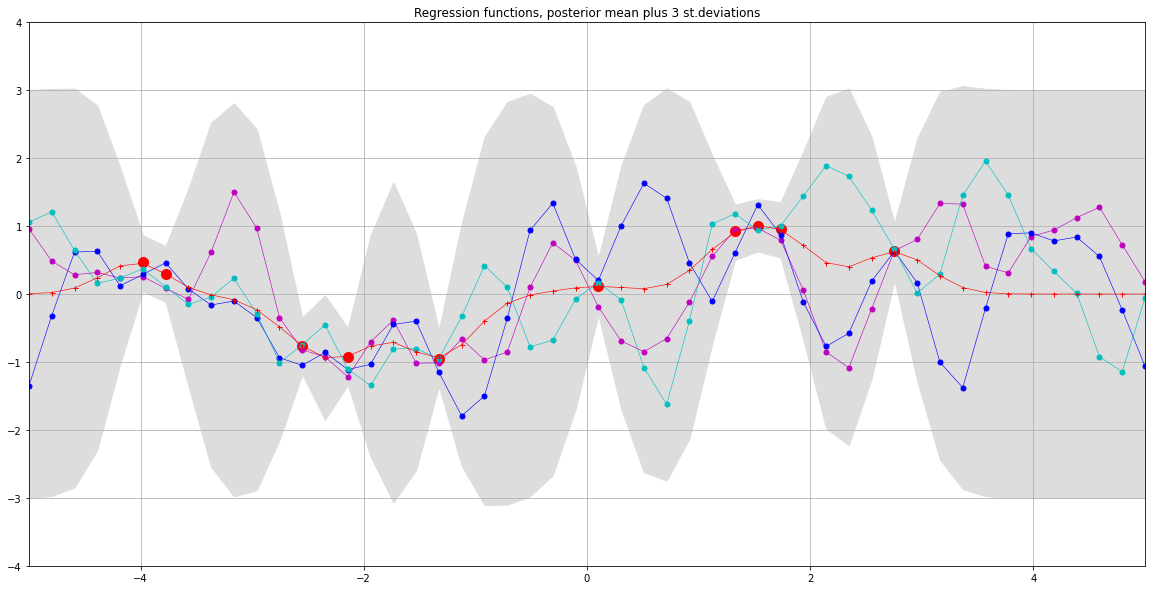

In [18]:
# Plot the functions sampled from the posterior distribution

plt.figure(1, figsize=(20, 10))
plt.clf()

plt.plot(Xtrain, Ytrain, 'ro', ms=10)

plt.plot(Xtest, f_post[:,0], marker='o', color = 'm', markersize=5, linewidth=0.6)
plt.plot(Xtest, f_post[:,1], marker='o', color = 'b', markersize=5, linewidth=0.6)
plt.plot(Xtest, f_post[:,2], marker='o', color = 'c', markersize=5, linewidth=0.6)

plt.gca().fill_between(Xtest.flat, meanFs-3*stdFs, meanFs+3*stdFs, color="#dddddd")

plt.plot(Xtest, meanFs, marker='+', color='r', markersize=5, linewidth=0.6)

plt.savefig('predictive.png', bbox_inches='tight')
plt.title('Regression functions, posterior mean plus 3 st.deviations')
plt.axis([-5, 5, -4, 4])
plt.grid()

## Use scikit-learn lib

##### In this part we will repeat the same by using the scikit-learn library

In [19]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF

In [26]:
l = kernel_param**0.5

kernel = RBF(length_scale=l, length_scale_bounds='fixed')

##### Where RBF is:
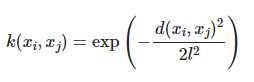

In [28]:
gaussian_process = GaussianProcessRegressor(kernel=kernel, alpha=sn, n_restarts_optimizer=0)

gaussian_process.fit(Xtrain, Ytrain)

mean_prediction, std_prediction = gaussian_process.predict(Xtest, return_std=True)

print(mean_prediction)
print(std_prediction)

[ 3.29460835e-03  2.10758799e-02  8.79987810e-02  2.38332535e-01
  4.14151101e-01  4.52124459e-01  2.95586265e-01  9.79251659e-02
 -1.25256531e-02 -8.50879822e-02 -2.30842301e-01 -4.83621500e-01
 -7.62925289e-01 -9.37384954e-01 -9.17779074e-01 -7.66284774e-01
 -7.11391879e-01 -8.50625774e-01 -9.40025903e-01 -7.46995675e-01
 -3.97726635e-01 -1.36505977e-01 -1.54844307e-02  4.37544740e-02
  9.06179387e-02  1.12620573e-01  9.56753209e-02  7.80650279e-02
  1.40361214e-01  3.47645581e-01  6.55362037e-01  9.08777391e-01
  1.01041151e+00  9.45180484e-01  7.15387367e-01  4.61862441e-01
  4.00516974e-01  5.33233077e-01  6.22975839e-01  5.02383440e-01
  2.68741091e-01  9.48603025e-02  2.20798520e-02  3.38869438e-03
  3.42916702e-04  2.28804357e-05  1.00660547e-06  2.91993789e-08
  5.58479550e-10  7.04304186e-12]
[0.99996584 0.9986682  0.9782122  0.84580075 0.4833538  0.13758365
 0.13758364 0.48332537 0.84493027 0.96413763 0.88613816 0.55588356
 0.13971637 0.30544955 0.13971426 0.54276343 0.78565

In [39]:
# We compare with the previous obtained results

diff_mean = meanFs - mean_prediction
diff_var = varFs - (std_prediction**2)

print('Predictive mean vectors sum of diff: ' + str(diff_mean.sum()) )
print('Predictive variance vectors sum of diff: ' + str(diff_var.sum()) )

Predictive mean vectors sum of diff: 2.5883274924289305e-14
Predictive variance vectors sum of diff: -4.458933222650785e-14
